# Descriptive Anlytics


In [13]:
# Import libs
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read the dataset
dta_file_path = 'MSI_2024_CEI_Afghanistan.dta'
csv_file_path = 'MSIA_2024_CEI Data.csv'

stata_data = pd.read_stata(dta_file_path, convert_categoricals=False)
original_data = pd.read_csv(csv_file_path)

In [5]:
# Check basic information and first few rows of the stata
stata_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Columns: 380 entries, starttime to pillar1
dtypes: datetime64[ns](4), float32(109), float64(128), int16(31), int32(1), int8(77), object(30)
memory usage: 611.7+ KB


In [6]:
# Check basic information and first few rows of the csv
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Columns: 380 entries, starttime to pillar1
dtypes: float64(28), int64(37), object(315)
memory usage: 991.7+ KB


In [8]:
# Read labels stata file
itr = pd.read_stata(dta_file_path, iterator=True)
itr.variable_labels()

{'starttime': 'starttime',
 'endtime': 'endtime',
 'deviceid': 'deviceid',
 'devicephonenum': 'devicephonenum',
 'subscriberid': 'subscriberid',
 'simid': 'simid',
 'DATAUSE': 'Client consent for sharing anonymous data',
 'DATE': "Enter today's date",
 'FACTYPE': 'Type of facility or site',
 'NAME_C': 'Enter the name of the Centre',
 'NAME_OR': 'Enter the name of the Outreach site',
 'NAME_SF': 'Enter the name of the Social Franchise',
 'NAME_MSL': 'Enter the name of the MS Lady/ site',
 'NAME_PSS': 'Enter the name of the PSS site',
 'NAME_OTH': 'Enter the name of the site',
 'REGION': 'Enter facility/site region',
 'LOCATION': 'Enter type of location',
 'TR2DH': 'How long did it take you to travel here today? Hours',
 'TR2DM': 'How long did it take you to travel here today? Minutes',
 'FPTYPE': 'FPTYPE',
 'FPTYPEFPMETH': 'Contraception: Contraceptive method(s) received',
 'FPTYPEFPREM': 'Contraception: Contraceptive method removed',
 'FPTYPEFPNO': 'Contraception: No contraceptive meth

## Module 1: Interview and Site Information
1. How is the distribution of facility types across regions?
2. What is the most common location type for different facility types?
3. What are the regional distributions of specific facility types?
4. How does the naming pattern of facilities vary by type?
5. What is the proportion of outreach sites compared to other site types?
6. Are there patterns in the regions associated with specific site types?

### Variables
- 'DATE': "Enter today's date",
- 'FACTYPE': 'Type of facility or site',
- 'NAME_C': 'Enter the name of the Centre',
- 'NAME_OR': 'Enter the name of the Outreach site',
- 'NAME_SF': 'Enter the name of the Social Franchise',
- 'NAME_MSL': 'Enter the name of the MS Lady/ site',
- 'NAME_PSS': 'Enter the name of the PSS site',
- 'NAME_OTH': 'Enter the name of the site',
- 'REGION': 'Enter facility/site region',
- 'LOCATION': 'Enter type of location',

### Case Scenario
1. How does service quality vary by facility type?
2. Are there any trends in service delivery time based on geographic location?


In [26]:
# How is the distribution of facility types across regions?
original_data['REGION'].replace('Other', 'Central', inplace=True)

facility_types = original_data.groupby(['REGION', 'FACTYPE']).size().reset_index(name='Count')
facility_types

,REGION,FACTYPE,Count
0,Central,MSI centre,29
1,East,MSI centre,10
2,North,MS Lady,65
3,North,MSI centre,32
4,North,Outreach,69
5,South,MS Lady,23
6,South,MSI centre,20
7,West,MS Lady,21
8,West,MSI centre,24
9,West,Outreach,41


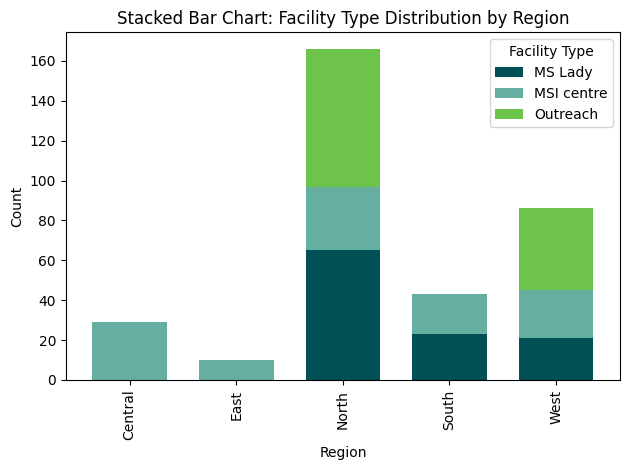

In [38]:
# Visualization: Stacked bar chart
vis_facility_types = facility_types.pivot(index='REGION', columns='FACTYPE', values='Count')

vis_facility_types.plot(kind='bar', stacked=True, width=0.7, color=['#005055', '#64afa0', '#6ec34b', '#198cc3'])
plt.title('Stacked Bar Chart: Facility Type Distribution by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Facility Type')
plt.tight_layout()

plt.show()